In [1]:
#importing all required libraries

import PyPDF2
import os
from os import listdir
from os.path import isfile, join
from io import StringIO
import pandas as pd
from collections import Counter
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

In [2]:
#Function to read resumes from the folder one by one
mypath='PDFresume' #enter your path here where you saved the resumes
onlyfiles = [os.path.join(mypath, f) for f in os.listdir(mypath) if os.path.isfile(os.path.join(mypath, f))]

In [3]:
def pdfextract(file):
    fileReader = PyPDF2.PdfFileReader(open(file,'rb'))
    countpage = fileReader.getNumPages()
    count = 0
    text = []
    while count < countpage:    
        pageObj = fileReader.getPage(count)
        count +=1
        t = pageObj.extractText()
        print (t)
        text.append(t)
    return text

In [4]:
#function to read resume ends


#function that does phrase matching and builds a candidate profile
def create_profile(file):
    text = pdfextract(file) 
    text = str(text)
    text = text.replace("\\n", "")
    text = text.lower()
    
    #below is the csv where we have all the keywords, you can customize your own
    keyword_dict = pd.read_csv('Skills_keywords.csv',encoding= 'unicode_escape')
    stats_words = [nlp(text) for text in keyword_dict['Statistics'].dropna(axis = 0)]
    NLP_words = [nlp(text) for text in keyword_dict['NLP'].dropna(axis = 0)]
    ML_words = [nlp(text) for text in keyword_dict['Machine Learning'].dropna(axis = 0)]
    DL_words = [nlp(text) for text in keyword_dict['Deep Learning'].dropna(axis = 0)]
    R_words = [nlp(text) for text in keyword_dict['R Language'].dropna(axis = 0)]
    python_words = [nlp(text) for text in keyword_dict['Python Language'].dropna(axis = 0)]
    Data_Engineering_words = [nlp(text) for text in keyword_dict['Data Engineering'].dropna(axis = 0)]
    Job_JD_words = [nlp(text) for text in keyword_dict['Job JD'].dropna(axis = 0)]
    Personal_Traits_words = [nlp(text) for text in keyword_dict['Personal Traits'].dropna(axis = 0)]
    

    matcher = PhraseMatcher(nlp.vocab)
    matcher.add('Stats', None, *stats_words)
    matcher.add('NLP', None, *NLP_words)
    matcher.add('ML', None, *ML_words)
    matcher.add('DL', None, *DL_words)
    matcher.add('R', None, *R_words)
    matcher.add('Python', None, *python_words)
    matcher.add('DE', None, *Data_Engineering_words)
    matcher.add('JobJD', None, *Job_JD_words)
    matcher.add('Personality', None, *Personal_Traits_words)
    
    
    doc = nlp(text)
  
    d = []  
    matches = matcher(doc)
    for match_id, start, end in matches:
        rule_id = nlp.vocab.strings[match_id]  # get the unicode ID, i.e. 'COLOR'
        span = doc[start : end]  # get the matched slice of the doc
        d.append((rule_id, span.text))      
    keywords = "\n".join(f'{i[0]} {i[1]} ({j})' for i,j in Counter(d).items())
    
    ## convertimg string of keywords to dataframe
    df = pd.read_csv(StringIO(keywords),names = ['Keywords_List'])
    df1 = pd.DataFrame(df.Keywords_List.str.split(' ',1).tolist(),columns = ['Subject','Keyword'])
    df2 = pd.DataFrame(df1.Keyword.str.split('(',1).tolist(),columns = ['Keyword', 'Count'])
    df3 = pd.concat([df1['Subject'],df2['Keyword'], df2['Count']], axis =1) 
    df3['Count'] = df3['Count'].apply(lambda x: x.rstrip(")"))
    
    base = os.path.basename(file)
    filename = os.path.splitext(base)[0]
       
    name = filename.split('_')
    name2 = name[0]
    name2 = name2.lower()
    ## converting str to dataframe
    name3 = pd.read_csv(StringIO(name2),names = ['Candidate Name'])
    
    dataf = pd.concat([name3['Candidate Name'], df3['Subject'], df3['Keyword'], df3['Count']], axis = 1)
    dataf['Candidate Name'].fillna(dataf['Candidate Name'].iloc[0], inplace = True)

    return(dataf)

In [5]:
#function ends
        
#code to execute/call the above functions

final_database=pd.DataFrame()
i = 0 
while i < len(onlyfiles):
    file = onlyfiles[i]
    dat = create_profile(file)
    final_database = final_database.append(dat)
    i +=1
    print(final_database)

 
 

WILLIAM JAMES DUDZIAK
 
(330) 256
-
0101 (
C
ell)
 
will@
dudziak
.com
 
Personal Website: 
http://www.dudziak.com
 
LinkedIn: 
http://www.linkedin.com/in/willdudziak
 
EXPERIENCE
 
 
2011

present
 
The Rubicon Project
 
 
Sr. 
Software Engineer / Data Scientist
 
Individually responsible for core pricing systems of Rubicon's 4.5 billion 
online 
ads per day.
 
Create solutions to detect useful 
patterns in terabytes of daily logs, in order to price ads more 
effectively.
 
Provide 
engineering solutions for
 
business
 
to effectively make 
a variety of 
advertising 
decisions
 
including 
campaign 
prioritization and pacing
.
 
2009

2011
 
The Rubicon Project
 
Application Interfaces Software Engineer
 
Responsible for
 
l
ead
ing
 
multi
-
team projects to facilitate business and engineering needs 
in a zero
-
downtime environment.
 
Developed and maintained "Matchmaker" service, individually targeting the 4.5 billion 
ads per day 
the company serves.
 
Successfully lead mult

  Candidate Name Subject          Keyword Count
0  candidate (1)   JobJD            data      4
1  candidate (1)   JobJD  data scientist      1
2  candidate (1)   JobJD            lead      7
3  candidate (1)      DE             sql      2
4  candidate (1)      DL            cuda      1
5  candidate (1)   JobJD     development      1
6  candidate (1)      ML  decision trees      1
7  candidate (1)   JobJD        analysis      2
8  candidate (1)   JobJD          global      1
Jay Kavathiya
 
Front
-
end Developer 
-
 
General Electric
 
 
New Orleans
 

on Front
-
end Development. 
 

analysis, design
 
development, testing and documentation. 
 

-
end Web
-
Design and Development using 
HTML5, CSS3, JavaScript, JavaScript OOP, jQuery, AJAX. 
 

responsive Single Page
 
Application (SPA) and Dynamic Web Applications 
using MVC Architecture and created POC's and initial integration for 
Angular 2.0. 
 

between front
-
end and back
-
end. 
 

Twitter Bootstrap 3 framework and Media Query


testing of code. 
 

information, and connect to AJAX when submit page. 
 

g issues. 
 

characterization. Also reduced costs through test time improvements. 
 
 
 
Environment: HTML, CSS, JavaScript, AJAX, Eclipse, Firebug.
 
Junior
-
level Web Developer
 
Space O Technologi
es 
-
 
Ahmedabad, Gujarat
 
August 2010 to May 2012
 
Space O Technologies, is an Indian company who build mobile application. 
 
Responsibilities: 
 

-
friendly UI. 
 

face guidelines and standards 
throughout the development and maintenance of the website using DHTML, 
HTML, CSS, and JavaScript. 
 

using XHTML and CSS. Created detailed wire frames & p
rocess flows. 
 

and cascade concepts, Box model with fixed width, fluid & elastic 
layouts. 
 

reducing bandwidth usage and
 
load time and add modal dialog in web pages 
to get user input and requests. 
 

small projects. 
 
 
 
Environment: HTML, DHTML, CSS, JavaScript, AJAX, JSON, Eclipse
 
Skills
 
ajax (5 years), 
CSS (5 years), HTML (5 years), JavaSc


transformation from JSP based 
UI to Angular based HTML formats. 
 

JQuery, HTML5, CSS3, Dojo, DOM, RESTful API Services, ReactJs, Media 
Query JavaScript, Node.js, Bootstrap, and JSON. 
 

sed Ajax, JSON to send request to the server to check the 
functionality of the websites. 
 

-
functional HTML, CSS pages from the mock ups and involved 
in UI review with UI architect and business units. 
 

Responsive Web Design (RWD) UI, 
Rich Restful Service Applications, and HTML Wireframes using HTML5 Grid 
Structures/Layouts, CSS3 Media Queries, Ajax, AngularJS and Bootstrap 
 

latest relea
se. 
 

including Analysis, Design, Development, Documentation, Testing, 
Deployment, Version Control and production support. 
 

nsive 
design. 
 

-
karma, Angular Mock. 
 

debugging. 
 

and SEO t
echniques. 
 

on different browsers like safari, IE, Firefox and Google chrome. 
 

directives, Factories and Services in
 
AngularJS. 
 

more flexible and strong. Used Junit for Unit Test 
 

and used 


 
Environme
nt: J2EE, Java/JDK, JMS, PL/SQL, JDBC, JSP, Servlets, 
JavaScript, Tomcat, JNDI, JavaBeans, XML, HTML/ DHTML, UML.
 
Skills
 
HTML (6 years), JavaScript (7 years), UI (7 years), user interface (7 
years), XML. (5 years)
 
Additional Information
 
TECHNICAL SKILLS: 
 
UI Web Technologies HTML5, CSS3, XML, AJAX, JSON, UI Concept 
Modeling/Wire framing, Bootstrap, SASS, Gulp. 
 
UI Frameworks Angular.js, jQuery, JavaScript, Ext JS, DOJO, Knockout, 
backbone.js, Require.js, Node.js, React.js, Redux.js 
 
IDE, HTML Editor Sublime
 
text 3, Eclipse IDE, Notepad++, Edit Plus, 
WebStorm. 
 
Version Control GIT HUB, SVN, Perforce, CVS 
 
Debugging Tools Radar, JIRA, Firebug 
 
Web/App Servers WebLogic, Apache Tomcat, HTTP Web Server. 
 
Methodologies Agile, Waterfall, Rational Unified Process (R
UP) 
 
Database MySQL, SQL Server, Oracle11g/10g, PL/SQL. 
 
Operating Systems iOS, Windows XP/7/8, UNIX and LINUX 
 
Web Services REST, SOAP
 

   Candidate Name      Subject              



process. 
 

 
 
 
Environment: JDK 1.6, JSP 2.2, Spring 3.0, Hibernate 3.0, HQL, Web 
Se
rvices (REST), JSON, JDBC 3.0, JavaScript, HTML, servlet, CSS, JSP, 
Spring MVC, Servlet XML 1.0, AJAX, Eclipse 3.7, WebLogic 10.3.1, PL/SQL, 
Oracle 10g, Windows, CVS, Maven, RDMBS.
 
Java/J2EE Developer
 
CSC 
-
 
Hyderabad, ANDHRA PRADESH, IN
 
August 2013 to Apri
l 2014
 
e
-
Medical System is an online application which has been developed at 
CSC. The objective of the project was to redesign a hospital management 
system from a thick client
-
server application to a thin web
-
based client. 
The project was designed for the 
hospital/clinic to manage their 
patients, their treatments, their results. The redesigned application can 
now let patients also login to the system to setup/change their 
appointment, view their treatment plans and pay their bills. 
 
 
 
Responsibilities: 
 

nvolvement in all phases of the Software Development Life Cycle (SDLC) 
 

and performance issues. 
 

and Se

 
 
Environment: Java, J2EE, Struts, JSP, Servlets, JavaScript, Hibernate, 
SOAP, WebLogic, Log4j, Maven, CVS, PL/SQL, Oracle, Windows
 
Java Developer
 
Valuelabs
 
September 2008 to October 2010
 
Description:Th
is module is for compliant registration. There are two 
categories of user, one is the Administrator and other is normal user. 
Administrator can create new users, Edit user profiles, Delete the users 
and Check customer order status. Normal users have a uniq
ue ID, by this 
ID they can submit their Complaint. Complaint can be Packing Related, 
Quality Related, Documentation related etc. Administrator can check the 
status and type of complaint and forward it to related departments. 
Administrator can see the Compl
aint status in various ways such as by 
date or by name. They can also see monthly or weekly complaint reports. 
 
Responsibilities: 
 

 

 

acle PL/SQL for database operations using JDBC API. 
 

Delete the records. 
 

using Java/J2EE Technologies. 
 

oped App


part of development cycle. 
 

 

tracking the applications and SVN used for version 
control. 
 

 

and deployment. 
 

in migrating java 
applications to the cloud using EC2, S3 and object storage container to 
store and retrieved secured files, from API. 
 

Server. 
 

application and JIRA for bug 
and issue tracking. 
 

project. 
 
 
 
Environment: Eclipse, PL/SQL, Oracle11g, Log4j, DB2, Maven, REST, SOAP, 
JSTL, SVN, Servlets, Agile, microService, GIT, Kaf
ka, iBatis.
 
Sr. Java Developer
 
Synchrony Financial 
-
 
San Francisco, CA
 
September 2015 to December 2016
 
Description: Synchrony Financials is a different kind of financial firm. 
Our mission is to design Web
-
 
Based service that more efficiently manages 
invoic
ing from purchase order (PO) through payment notification. The web 
application provides functionalities such as managing the policy, profile 
management and reporting claim. The customer can access complete account 
information, policy information, receive

forEnd
-
2
-
End test suites for eBay's DAL (Data Access Layer) . It provides 
easy and flexible means for developerto add and modify test suites. DAL 
test harness framework can offer the functions 
 
to automatically set up various DAL environment based on input 
parame
ters, execute test suites to 
 
mimic DAL behavior, verify andreport the results back to user and 
dynamically add new test suites to the framework. 
 
 
 
Responsibilities 
 

 
Application was based on MVC architecture 
 

 
Created dynamic views usingAngularJS, Boot
strap with cutting edge 
HTML5 and CSS3, 
 
AJAX techniques 
 

 
Developed the DAO layer for the application using Spring Hibernate 
Template support. 
 

 
Clear quest for tracking the tasks and GIT for version control. 
 

 
Experience in development of JavaScript f
or client side validations. 
 

 
Used JSON for transferring/retrieving data between different 
Applications. 
 

 
Also wrote some complex SQL queries using Joins, Stored Procedures, 
Fu

    Candidate Name      Subject          Keyword Count
0    candidate (1)        JobJD            data      4
1    candidate (1)        JobJD  data scientist      1
2    candidate (1)        JobJD            lead      7
3    candidate (1)           DE             sql      2
4    candidate (1)           DL            cuda      1
..             ...          ...              ...   ...
5   candidate (16)           DE             aws      2
6   candidate (16)  Personality   communication      2
7   candidate (16)        JobJD            lead      1
8   candidate (16)        JobJD     data access      8
9   candidate (16)        JobJD   data analysis      1

[66 rows x 4 columns]
soundarya java developer
 
Software Developer 
-
 
DirecTV
 
 
Wilmington
 

development, deployment, testing and support of Client Server Systems and 
Web Applications 
 

gn and development of multi
-
tier web based 
applications using J2EE technologies JAVA, JAVA Swing, Servlets, JSP, 
Oracle, MySQL, MS SQL and J

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
2   candidate (17)      DE             sql      6
3   candidate (17)   JobJD            data      6
4   candidate (17)   JobJD          global      2
5   candidate (17)   JobJD        analysis      1
6   candidate (17)  Python          python      1

[73 rows x 4 columns]
Dinesh Maharajan
 
Java UI Developer 
-
 
Java UI
 
 
Charlotte, North Carolina
 

activities including requirement analysis, design, implementation and 
testing with emphasis on Object Oriented, J2E
E and Client Server 
technologies. 
 

Developing, maintaining and supporting the Java, J2EE applications. 
 

and sequence diag
rams using Rational Rose and MS Visio tool. 
 



    Candidate Name Subject           Keyword Count
0    candidate (1)   JobJD             data      4
1    candidate (1)   JobJD   data scientist      1
2    candidate (1)   JobJD             lead      7
3    candidate (1)      DE              sql      2
4    candidate (1)      DL             cuda      1
..             ...     ...               ...   ...
2   candidate (18)   JobJD      data access      2
3   candidate (18)   JobJD      development      8
4   candidate (18)      DE              sql      9
5   candidate (18)   JobJD  data processing      2
6   candidate (18)   JobJD       deployment      3

[80 rows x 4 columns]
Gobinath Subramani
 
B.Tech
.,
 
MBA
.,
 
PGP (Data science)
 
Data scientist 
at QuEST Global Engineering Services Private Limited
 
7,1
ST
 
street,
 
Garavepalya, Bangalore, 560068.
 
gobinathapple@icloud.com
 
||
Mobile:
 
+91 
9787347659
 
 
Career Summary
 
Analytics with strong 
math background and 5+ years of experience using predictive modelling, data pr

    Candidate Name Subject            Keyword Count
0    candidate (1)   JobJD              data      4
1    candidate (1)   JobJD    data scientist      1
2    candidate (1)   JobJD              lead      7
3    candidate (1)      DE               sql      2
4    candidate (1)      DL              cuda      1
..             ...     ...                ...   ...
11  candidate (19)      DL  object detection      4
12  candidate (19)      DL        tensorflow      2
13  candidate (19)      DL            opencv      2
14  candidate (19)      DL    face detection      1
15  candidate (19)   JobJD     data analysis      1

[96 rows x 4 columns]
Data Scientist Intern
 
Resume posted by 
swamivijay1993
 
in 
IT
. 
 
Desired salary: 
$75,000.00
 
 
Desired position type: 
Full
-
Time
 
 
Location: Charlotte North Carolina, United States 
 
Summary
 
Flexible and experienced data scientist willing to learn new technologies. Commendable skills in 
statistical languages, Hadoop and machine learnin

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
0   candidate (21)   JobJD            data     18
1   candidate (21)   JobJD  data scientist      1
2   candidate (21)   JobJD        analysis      1
3   candidate (21)   JobJD     development      1
4   candidate (21)      DE          hadoop      1

[117 rows x 4 columns]
 
Jr. Data 
Scientist
 
 
Consorzio Milano Ricerche (CMR) 

 
www.milanoricerche.it
 
-
 
is hiring gradu
ate students (1 one year contract) 
for 
Junior Data 
Scientist
 
positions
.
  
CMR is a no
-
profit organisation 
working 
through cooperative projects linking 
universities, research centres, industrial companies and small and medium
-
sized enterprises (SMEs)
 
The 

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
8   candidate (25)   JobJD            lead      1
9   candidate (25)      DE             sql      2
10  candidate (25)      DE            hive      1
11  candidate (25)      DE             aws      1
12  candidate (25)      ML             svm      1

[144 rows x 4 columns]
SHANSHANDING
(440)463-2990

NewYork,NY
shanshan.ding08@gmail.com

shanshanding.github.io
SUMMARY
Datascientistandmathematicianwithfouryearsoftechindustryexperienceinawiderangeoffunctions
includingpredictivemodeling,contentdiscovery,NLP,datawarehousing,andproductanalytics.
EDUCATION
UniversityofPennsylvania
Philadelphia,PA
Ph.D.inMathematics2008-2014

Concentration:Probabili

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
0   candidate (26)       R               r      2
1   candidate (26)      ML             svm      1
2   candidate (26)      ML             svd      1
0   candidate (27)  Python          python      1
1   candidate (27)       R               r      1

[149 rows x 4 columns]
SaurabhGupta
SeniorYearB.TechStudent+919911592327
ComputerScienceandEngineering
cs1070185@cse.iitd.ernet.in
IndianInstituteofTechnologyDelhi
http://www.cse.iitd.ernet.in/
~
cs1070185
AcademicDetails
Year
Degree
Institute
Percentage/CGPA
2007-
BTechinComputerScience
IndianInstituteofTechnology
CGPA=9.938/10
Present
andEngineering
Delhi
InstituteRank1
2007
ClassXII
BalBharati

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
1   candidate (29)  Python          python      6
2   candidate (29)   JobJD     development      5
3   candidate (29)   JobJD            data      2
4   candidate (29)   JobJD        analysis      3
5   candidate (29)      DL          opencv      1

[157 rows x 4 columns]
Abhishek Rajput
 
Room no.  A
-
215 Hall X,
 
Mobile:  +91
-
9451397574
 
Indian Institute of Technology, Kanpur,
 
E
-
Mail:  arajput.cse@gmail.com
 
UP, India.
 
Alternate:  arajput@cse.iitk.ac.in
 
RESERACH INTERESTS
 

 
Parallel Systems & Programming Languages
 

 
Compilers, 
High Performance Computing
 
EDUCATION
 
Year
 
Degree
 
Institute
 
Performance
 
2011(Expec

The project provides users an account
-
based access to a on online storage 
space.  The web
-
based
 
interface provides different levels of access to the resources on the 
server based on the c
lass(paid/trial) of the
 
user.   A  user  can  upload/download  and  search  for  desired  files.   
A  relational  database  is  used  for  storing  the
 
account information.
 
INTERNSHIP/WORK EXPERIENCE
 
Microsoft India Development Center
 
May 2009 
-
 
July 2009
 

 
Intern Position:
 
:  Program Manager + Software Development Engineer
 

 
Mentor:
 
Mr.  Gautam Bajekal
 

 
Description:
 
:  I worked with the Office Communicator team at MSIDC, working as a 
Program Manager.  The
 
task  was  to  co
-
ordinate,  propose,  develop,  f
inalize  and  implement  

 
Prototyping of web
-

-
meeting 
and Out
-
of
-
Meeting scenarios were
 
developed, demonstrated and discussed amongst a team of senior program 
managers.
  
The internship provided
 
exposure to a healthy team
-
based work envi

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
2    candidate (3)   JobJD            data      4
3    candidate (3)      DE          hadoop      1
4    candidate (3)  Python          python      1
0   candidate (30)   JobJD            data      7
1   candidate (30)      DL            lstm      4

[164 rows x 4 columns]
MichelePratusevich
mprat@alum.mit.edu
j
(617)8559497
j
www.mprat.org
Education
MassachusettsInstituteofTechnology(MIT)
M.Eng.inElectricalEngineeringandComputerScience
Sept2014-June2015

Advisors:Prof.RobertMillerandProf.AntonioTorralba

Thesis:
EdVidParse:DetectingPeopleandContentinEducationalVideos

Selectedcoursework:MachineLearning,ComputationalPhotography,ComputerandMac

    Candidate Name Subject          Keyword Count
0    candidate (1)   JobJD            data      4
1    candidate (1)   JobJD  data scientist      1
2    candidate (1)   JobJD            lead      7
3    candidate (1)      DE             sql      2
4    candidate (1)      DL            cuda      1
..             ...     ...              ...   ...
4   candidate (31)  Python           scipy      1
5   candidate (31)      DL          opencv      1
0   candidate (32)   JobJD            data      1
1   candidate (32)  Python          python      1
2   candidate (32)      DL          opencv      1

[173 rows x 4 columns]
!"#$%&'()**+
(!"#$%&
'(()*)+,*-.-/'01234&
'5#$6256728"3$29:##;<5#1
'''=%8&
'28"3$29:##;<5#1
'>'836<4?@:##;A43$B%;3$
'>'836<4?@:##;AC36"D8
''',-.#%$.&/(
)0$//1
(!?6"#$
E'FGH
E'IE'F5242E'
FJ2KB
E'L2;##JE'L39%
E'M%K2:
E'F53B36
*4%2K$
E'N284%2D
E'O$3PE'
Q36
'(23*4-11$*%&/
(567-3$-%.-
(8&9&().$-%9$19:(!39$4$.$&/(;%9-//$<-%.-(&%+(=&.#$%-(>-&3%$%<
'F5#63282$B'
R'N#K#$6#
E'S2$2;2
'


that include Use Cases, Class Diagrams, Sequence Diagrams and Activity 
Diagrams. 
 

 

 

 

 

 
and functions and actively involved 
in the design of views and triggers in the Oracle database. 
 

 

 

sed for sending e
-
delivery 
to policyholders. 
 

 

 

 

pplication logging and debugging. 
 
 
 
Technologies: Java, J2EE, JSP, spring, JDBC, Ant, log4j, Oracle 10g, 
jQuery, and JUnit 
 
Server: Weblogic 
 
Database: Oracle 
 
Tools: Eclipse, SQL Developer, SVN, Java docs
 
Software Engineer
 
HSBC 
-
 
Hyderabad, ANDHRA PRADES
H, IN
 
January 2011 to May 2012
 
India 
 
 
 
Description: As a Software Engineer, utilized Java technologies in 
developing banking application to fulfill the business requirements of 
customers in secured manner to create accounts and perform services. 
 
 
 
Respon
sibilities: 
 

Tiles Framework with respect to Model
-
View
-
Controller (MVC 2) 
Architecture. 
 

Beans to fulfill Bus
iness Logic. 
 

 

information. 
 

represent persistent d
ata

State Compensation Insurance Fund 
-
 
New York, NY
 
September 2013 to April 2015
 
Description: As a Java developer, developed web services utilizing Java, 
Groovy, Grails by building and deploying in CI environment. Provided 
s
upport for deployments to ensure the applications are configured and 
deployed effectively. 
 
 
 
Responsibilities: 
 

conjunction with product management. 
 

ts the need of the functional and 
business requirements 
 

instructions, and application programming interface specifications 
 

orm 
 

-
use spring and hibernate under single interface 
 

typing using Groovy. 
 

directories. 
 

s for persisting the objects. 
 

functionality of the written code behaves as expected over time 
 

classes required, and t
ranslated system requirements to task 
specifications. 
 

-
RS APIs for developing web services. 
 

continuous integration environment. 
 

round with files and 
applications. 
 

solution is configured and deployed as expected 
 

 

t proces


that include Use Cases, Class Diagrams, Sequence Diagrams and Activity 
Dia
grams. 
 

 

 

 

 

d functions and actively involved 
in the design of views and triggers in the Oracle database. 
 

 

 

 
for sending e
-
delivery 
to policyholders. 
 

 

 

 

ication logging and debugging. 
 
 
 
Technologies: Java, J2EE, JSP, spring, JDBC, Ant, log4j, Oracle 10g, 
jQuery, and JUnit 
 
Server: Weblogic 
 
Database: Oracle 
 
Tools: Eclipse, SQL Developer, SVN, Java docs
 
Software Engineer
 
HSBC 
-
 
Hyderabad, ANDHRA PRADESH, 
IN
 
January 2009 to May 2012
 
India 
 
 
 
Description: As a Software Engineer, utilized Java technologies in 
developing banking application to fulfill the business requirements of 
customers in secured manner to create accounts and perform services. 
 
 
 
Responsib
ilities: 
 

Tiles Framework with respect to Model
-
View
-
Controller (MVC 2) 
Architecture. 
 

Beans to fulfill Busine
ss Logic. 
 

 

information. 
 

represent persistent data
base tab

Additional Information
 
TECHNICAL SKILLS: 
 
 
 
Programming Langua
ges JAVA, J2EE 
 
Client Scripting JavaScript, jQuery 
 
Operating Systems Windows 8/7/XP/NT, Unix & Linux 
 
Version Control Tortoise SVN, CVS, GIT 
 
Databases MySQL, Oracle 8i, 9i, 10g, 11g SQL Server, MySQL 
 
Database Tools SQL Developer, Toad for SQL Server, T
oad for MySQL, 
Connector for MySQL. 
 
Frameworks Hibernate 3.0, 4.0, JPA, Angular JS, React JS, 
 
J2EEMVC Frameworks Spring 3.0, Struts 1.3, 2.0 
 
Web Service Specifications JAX
-
WS (SOAP), JAX
-
RS (REST) 
 
Middleware Technologies JNDI, JMS 
 
Application Servers 
IBM Web Sphere Application Server 8.x & Apache Tomcat 
5.x 
 
Batch Scripting ANT 1.6, Maven 
 
XML Technologies XML Schema, XSD, XSLT, DTD, DOM, JAXB, SOAP, WSDL 
 
Methodologies Agile, Scrum, Test Driven Development, Business Driven 
Development,
 

   Candidate Name      Subject          Keyword Count
0   candidate (1)        JobJD            data      4
1   candidate (1)        JobJD  

the wi
nner will be announced by the admin. Player will get the win 
amount. This is based on the number of player participated on the game. 
 
http://www.islandluck.com:8039/BingoLive/LighteningBingo/Help/GameDefault
Help.aspx 
 
 
 
Project: Bejeweled Game 
 
Environment
: Flash ActionScript 3.0, FlashDevelop, .Net, JavaScript, MVC. 
 
Roles and Responsibilities: As a Software Engineer, I was responsible to 
analysis, designing the game, creating the structure, functionality 
implementation, logic gathering, analyzing the comp
lexity task into sub 
tasks and coordinating with backend team to get the right output for 
database details. Client communication, status sharing, delivering the 
final game with the end client with proper QA test. 
 
Description: It is a casino game for deskt
op, iPad, iPhone and mobiles. 
Here one grid will be shown that grid contains 64 gems. Player has to for 
3 or more identical matching as per his matching player will get score 
and win amount. Win amoun

In [6]:
#code to count words under each category and visulaize it through Matplotlib

final_database2 = final_database['Keyword'].groupby([final_database['Candidate Name'], final_database['Subject']]).count().unstack()
final_database2.reset_index(inplace = True)
final_database2.fillna(0,inplace=True)
new_data = final_database2.iloc[:,1:]
new_data.index = final_database2['Candidate Name']
print(new_data)

Subject          DE   DL  JobJD   ML  Personality  Python    R  Stats
Candidate Name                                                       
candidate (1)   1.0  1.0    6.0  1.0          0.0     0.0  0.0    0.0
candidate (10)  0.0  0.0    4.0  0.0          0.0     0.0  1.0    0.0
candidate (11)  2.0  0.0    5.0  0.0          0.0     2.0  1.0    0.0
candidate (12)  1.0  0.0    6.0  0.0          1.0     0.0  0.0    0.0
candidate (13)  2.0  0.0    5.0  0.0          0.0     0.0  0.0    0.0
candidate (14)  1.0  0.0    7.0  0.0          0.0     0.0  0.0    0.0
candidate (15)  4.0  0.0    5.0  0.0          0.0     0.0  0.0    0.0
candidate (16)  2.0  0.0    7.0  0.0          1.0     0.0  0.0    0.0
candidate (17)  1.0  0.0    5.0  0.0          0.0     1.0  0.0    0.0
candidate (18)  1.0  0.0    6.0  0.0          0.0     0.0  0.0    0.0
candidate (19)  0.0  4.0    9.0  1.0          0.0     1.0  1.0    0.0
candidate (2)   4.0  0.0    6.0  1.0          1.0     1.0  1.0    0.0
candidate (20)  1.0 

In [7]:
# Make a copy of the original sourcefile
new_data_excel= new_data.copy()
column_list = list(new_data_excel)#create a total score new column by adding the score 
new_data_excel["Total score"] = new_data_excel[column_list].sum(axis=1)
new_data_excel.sort_values(by=['Total score'], inplace=True,ascending=False)
new_data_excel["Rank_pct"] = new_data_excel["Total score"].rank(pct=True)#create a rank_pct new column based on the total score

In [8]:
format_dict = {'DE':'{0:,.0f}','DL':'{0:,.0f}','NLP':'{0:,.0f}','ML':'{0:,.0f}','JobJD':'{0:,.0f}','Personality':'{0:,.0f}','Python':'{0:,.0f}','R':'{0:,.0f}','Stats':'{0:,.0f}','Total score':'{0:,.0f}', 'Rank_pct': '{:.2%}'}
(new_data_excel
 .style
 .format(format_dict)
 .bar(color='#FFA07A', vmin=100_000, subset=['Total score'], align='zero')
 .bar(color='lightgreen', vmin=0, subset=['Rank_pct'], align='zero')
 .set_caption('Resume ranking score'))

Subject,DE,DL,JobJD,ML,Personality,Python,R,Stats,Total score,Rank_pct
Candidate Name,,,,,,,,,,
candidate (19),0,4,9,1,0,1,1,0,16,100.00%
candidate (2),4,0,6,1,1,1,1,0,14,96.77%
candidate (25),4,0,6,1,0,1,1,0,13,93.55%
candidate (11),2,0,5,0,0,2,1,0,10,88.71%
candidate (16),2,0,7,0,1,0,0,0,10,88.71%
candidate (1),1,1,6,1,0,0,0,0,9,82.26%
candidate (15),4,0,5,0,0,0,0,0,9,82.26%
candidate (12),1,0,6,0,1,0,0,0,8,75.81%
candidate (14),1,0,7,0,0,0,0,0,8,75.81%


In [9]:
# highlight the score value in each column.
def highlight_max(s):
    '''
    highlight the maximum in a Series yellow.
    '''
    is_max = s == s.max()
    return ['background-color: yellow' if v else '' for v in is_max]
new_data_excel.style.format(format_dict).apply(highlight_max).\
    to_excel('Resume_Score_highest_chart.xlsx', engine='openpyxl')
new_data_excel.style.format(format_dict).apply(highlight_max)

Subject,DE,DL,JobJD,ML,Personality,Python,R,Stats,Total score,Rank_pct
Candidate Name,,,,,,,,,,
candidate (19),0,4,9,1,0,1,1,0,16,100.00%
candidate (2),4,0,6,1,1,1,1,0,14,96.77%
candidate (25),4,0,6,1,0,1,1,0,13,93.55%
candidate (11),2,0,5,0,0,2,1,0,10,88.71%
candidate (16),2,0,7,0,1,0,0,0,10,88.71%
candidate (1),1,1,6,1,0,0,0,0,9,82.26%
candidate (15),4,0,5,0,0,0,0,0,9,82.26%
candidate (12),1,0,6,0,1,0,0,0,8,75.81%
candidate (14),1,0,7,0,0,0,0,0,8,75.81%


In [10]:
import seaborn as sns #create “heatmaps

cm = sns.light_palette("green", as_cmap=True)

new_data_excel.style.format(format_dict).background_gradient(cmap=cm).\
    to_excel('Resume_Score_heatmap_chart.xlsx', engine='openpyxl')
new_data_excel.style.format(format_dict).background_gradient(cmap=cm)

Subject,DE,DL,JobJD,ML,Personality,Python,R,Stats,Total score,Rank_pct
Candidate Name,,,,,,,,,,
candidate (19),0,4,9,1,0,1,1,0,16,100.00%
candidate (2),4,0,6,1,1,1,1,0,14,96.77%
candidate (25),4,0,6,1,0,1,1,0,13,93.55%
candidate (11),2,0,5,0,0,2,1,0,10,88.71%
candidate (16),2,0,7,0,1,0,0,0,10,88.71%
candidate (1),1,1,6,1,0,0,0,0,9,82.26%
candidate (15),4,0,5,0,0,0,0,0,9,82.26%
candidate (12),1,0,6,0,1,0,0,0,8,75.81%
candidate (14),1,0,7,0,0,0,0,0,8,75.81%


In [11]:
sample2=new_data_excel.to_csv('Resume_Rank_score.csv')

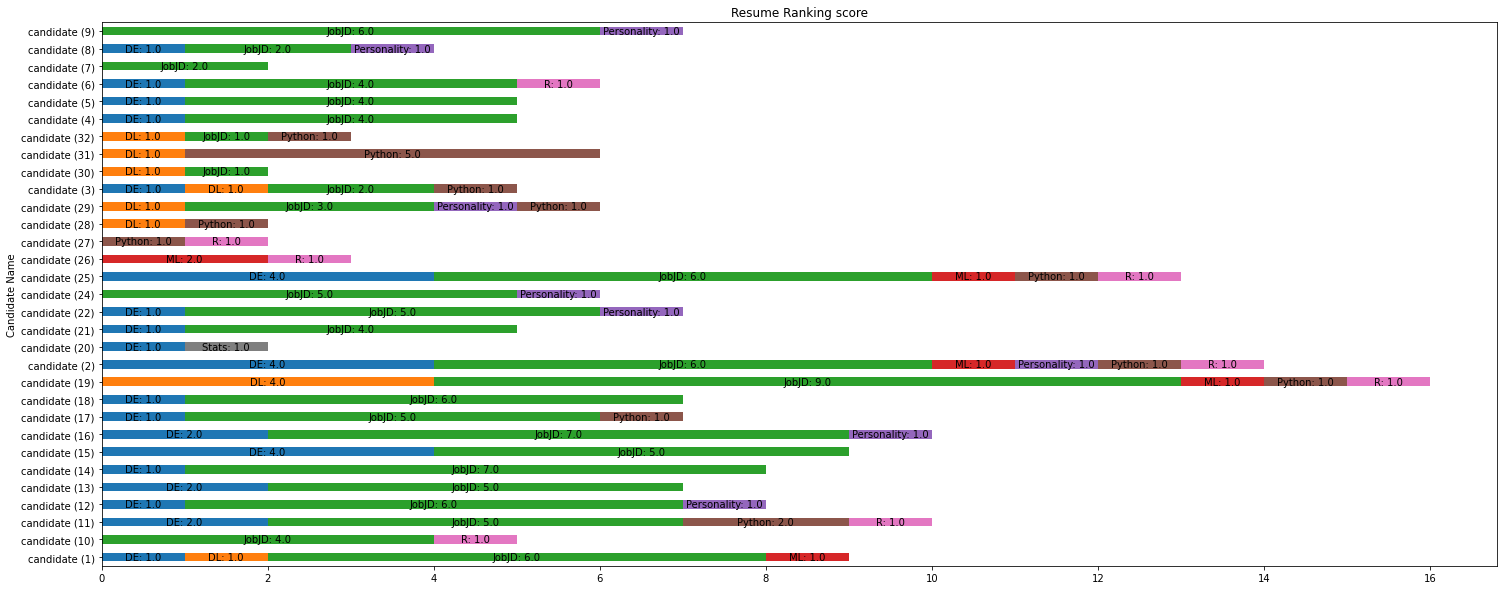

In [12]:
import matplotlib.pyplot as plt
plt.rcParams.update({'font.size': 10})
ax = new_data.plot.barh(title="Resume Ranking score", legend=False, figsize=(25,10), stacked=True)
labels = []
for j in new_data.columns:
    for i in new_data.index:
        label = str(j)+": " + str(new_data.loc[i][j])
        labels.append(label)
patches = ax.patches
for label, rect in zip(labels, patches):
    width = rect.get_width()
    if width > 0:
        x = rect.get_x()
        y = rect.get_y()
        height = rect.get_height()
        ax.text(x + width/2., y + height/2., label, ha='center', va='center')
plt.show()